In [1]:
# Dependencias - EJECUTA ESTA CELDA ANTES DE COMENZAR

# El paquete nnfs incluye la base de datos de entrenamiento que vamos a usar, y asegura que las semillas de los métodos random sean consistentes, para que nuestros resultados sean comparables
%pip install -q nnfs
%pip install -q numpy matplotlib

import nnfs
import matplotlib.pyplot as plt
import numpy as np

nnfs.init()

# Esta función la usaremos más adelante para ver los resultados de la red
# works only for model = model = [dense1, activation1, dense2, loss_activation]

def plot_prediction_performance_spiral(
        model: list | tuple,
        X, y,
        num_points: int = 100,
        ) -> None:
    """Plots the performance of the model in the spiral dataset with 3 categories"""

    def probabilities_to_rgb(probabilities_array):
        """ Maps an array of probabilities to RGB colors."""

        # Ensure that probabilities sum up to 1 for all data points
        if not np.all(np.isclose(np.sum(probabilities_array, axis=1), 1.0)):
            raise ValueError("Probabilities must sum up to 1 for all data points.")

        # Map probabilities to RGB channels (0-255) for all data points
        r, g, b = (probabilities_array * 255).astype(int).T

        # Return the RGB colors as a NumPy array
        return np.column_stack((r, g, b))

    # Create a meshgrid of points in the (-1,1)x(-1,1) space
    x_val = np.linspace(-1, 1, num_points)
    y_val = np.linspace(-1, 1, num_points)

    x_grid, y_grid = np.meshgrid(x_val, y_val)

    # Flatten the grids into 1D arrays
    x_flat = x_grid.flatten()
    y_flat = y_grid.flatten()

    # Combine the flattened arrays into an Nx2 array
    XX_tuples = np.column_stack((x_flat, y_flat))

    # Perform a forward pass through the network
    input = XX_tuples
    for layer in model[:-1]:
        layer.forward(input)
        input = layer.output

    # Assumed last layer is a softmax activation + loss function
    # 'y_true' here is random since it will not be used
    # (only the output of the softmax is needed)
    model[-1].forward(input, y_true=np.array([0]*len(model[-2].output)))

    probabilities_array = model[-1].output
    rgb_colors = probabilities_to_rgb(probabilities_array)
    probs_2d = rgb_colors.reshape(num_points, num_points,3)

    # Assumed 3 categories - change this if different
    colors = ['r' if label == 0 else 'g' if label == 1 else 'b' for label in y]

    plt.imshow(probs_2d, extent=(-1, 1, -1, 1), interpolation='bilinear')
    plt.scatter(X[:, 0], -X[:, 1], c = colors)
    #plt.axis('off')  # Turn off axis labels and ticks
    plt.show()# print(rgb_colors)  # This will print the RGB color array
    # plt.pcolor(xx, yy, rgb_colors)
    # plt.show()


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Ejercicio 1: Una neurona simple

<center>
<div>
<img src="https://drive.upm.es/index.php/apps/files_sharing/ajax/publicpreview.php?x=1920&y=457&a=true&file=neurona_simple.png&t=04gzB6Klm7RQkH6&scalingup=0" width="250"/>
</div>
</center>

Calcula el output de una neurona simple con cuatro inputs: $[1.0, 2.0, 3.0, 2.5]$, donde los correspondientes pesos son $[0.2, 0.8, -0.5, 1.0]$, y el sesgo es $2.0$.

In [2]:
# SOL EJ 1

inputs = [1.0, 2.0, 3.0, 2.5]
weights = [0.2, 0.8, -0.5, 1.0]
bias = 2.0

output = sum([inp * weig for inp, weig in zip(inputs,weights)]) + bias

print(output)

4.8


## Ejercicio 2: Una capa de neuronas

<center>
<div>
<img src="https://drive.upm.es/index.php/apps/files_sharing/ajax/publicpreview.php?x=1920&y=457&a=true&file=capa_neuronas_simple.png&t=IvPdbEiQJ9gFVxo&scalingup=0" width="250"/>
</div>
</center>

Calcula la salida de una capa de neuronas con cuatro entradas ($[1, 2, 3, 2.5]$) y tres neuronas:
 - Neurona 1: Pesos = $[0.2, 0.8, -0.5, 1]$, Sesgo = $2$
 - Neurona 2: Pesos = $[0.5, -0.91, 0.26, -0.5]$, Sesgo = $3$
 - Neurona 3: Pesos = $[-0.26, -0.27, 0.17, 0.87]$, Sesgo = $0.5$
  
Calcula la salida directamente sobre una lista, calculando para cada elemento las operaciones necesarias entre inputs, pesos y sesgos.


In [3]:
# SOL EJ 2

inputs = [1.0, 2.0, 3.0, 2.5]

weights1 = [0.2, 0.8, -0.5, 1.0]
weights2 = [0.5, -0.91, 0.26, -0.5]
weights3 = [-0.26, -0.27, 0.17, 0.87]

bias1 = 2
bias2 = 3
bias3 = 0.5

output = [sum([inp * weig for inp, weig in zip(inputs,weights1)])+bias1, sum([inp * weig for inp, weig in zip(inputs,weights2)])+bias2, sum([inp * weig for inp, weig in zip(inputs,weights3)])+bias3]

print(output)


[4.8, 1.21, 2.385]


# Ejercicio 3: Una capa de neuronas - generalización

Repite el ejercicio 2, pero utiliza un enfoque más general que permita realizar las mismas operaciones por neuronas de forma secuencial (utiliza un bucle ```for```). El formato de datos de entrada ahora es el siguiente:

In [4]:
inputs = [1, 2, 3, 2.5]
weights = [
    [0.2, 0.8, -0.5, 1],
    [0.5, -0.91, 0.26, -0.5],
    [-0.26, -0.27, 0.17, 0.87]
]
biases = [2, 3, 0.5]

In [5]:
# SOL EJ 3

layer_outputs = []

for neuron_weights, neuron_bias in zip(weights, biases):
    neuron_output = 0

    for n_input, weight in zip(inputs, neuron_weights):
        neuron_output += n_input * weight

    neuron_output += neuron_bias

    layer_outputs.append(neuron_output)

print(layer_outputs)


[4.8, 1.21, 2.385]


# Ejercicio 4: Prueba de eficiencia

Copia tu solución anterior, pero ahora utiliza un tamaño creciente de los datos de entrada: $n = [5, 50, 500, 5000]$. Genera listas del tamaño apropiado para los inputs, pesos y sesgos que contengan números aleatorios entre $1$ y $3$ para las entradas y sesgos y entre $-1$ y $1$ para los pesos. Supón distribuciones uniformes. Observa el rendimiento de tu implementación cuando $n$ crece.

In [6]:
#!pedidoHecho

# SOL EJ 4
# pista: usa np.random.uniform para generar arrays de números aleatorios
import time
for n in [5,50,500,5_000,50_000,500_000]:
    start_time = time.time()
    print(f'Generando neurona para input de tamaño {n}')
    inputs = np.random.uniform(1, 3, n)
    weights = [np.random.uniform(-1, 1, n),np.random.uniform(-1, 1, n),np.random.uniform(-1, 1, n)]
    biases = np.random.uniform(1, 3, len(weights))

    # <-- PEGA AQUÍ TU SOLUCIÓN DEL EJERCICIO 3
    layer_outputs = []

    for neuron_weights, neuron_bias in zip(weights, biases):
        neuron_output = 0

        for n_input, weight in zip(inputs, neuron_weights):
            neuron_output += n_input * weight

        neuron_output += neuron_bias

        layer_outputs.append(neuron_output)

    print(layer_outputs)
    print(f'--- {time.time() - start_time} seconds ---')


Generando neurona para input de tamaño 5
[6.501312269321404, 4.456713828510015, 1.855582421348706]
--- 0.0 seconds ---
Generando neurona para input de tamaño 50
[2.4950823163393347, 3.0116488277124414, -2.4830578173714257]
--- 0.0010025501251220703 seconds ---
Generando neurona para input de tamaño 500
[6.711816917989121, 57.952132429595395, -12.299885717541768]
--- 0.0 seconds ---
Generando neurona para input de tamaño 5000
[-75.93334469922107, -136.43718574749718, 143.3239558686616]
--- 0.0029964447021484375 seconds ---
Generando neurona para input de tamaño 50000
[441.87914240739707, 284.1653623653722, 399.04025339705726]
--- 0.031000614166259766 seconds ---
Generando neurona para input de tamaño 500000
[762.9975280786371, -778.5146601192423, -505.41561771882743]
--- 0.3076894283294678 seconds ---


## Ejercicio 5: Una neurona simple usando ```numpy```

Reimplementa el ejercicio 1 usando el paquete ```numpy```


In [7]:
# SOL EJ 5

import numpy as np
inputs = np.array([1.0, 2.0, 3.0, 2.5])
weights = np.array([0.2, 0.8, -0.5, 1.0])
bias = 2.0

outputs = np.dot(weights, inputs) + bias

print(outputs)

4.799999952316284


## Ejercicio 6: Una capa de neuronas usando ```numpy```

Reimplementa el ejercicio 2 usando el paquete ```numpy```. Realiza una prueba de eficiencia similar a la que realizaste en el ejercicio 4.


In [8]:
import numpy as np

inputs = np.array([1.0, 2.0, 3.0, 2.5])
weights = np.array([[0.2, 0.8, -0.5, 1],
                    [0.5, -0.91, 0.26, -0.5],
                    [-0.26, -0.27, 0.17, 0.87]])

biases = np.array([2.0, 3.0, 0.5])

In [9]:
#!# PEDIDO
#SOL EJ 6
%time 

layer_outputs = np.dot(weights, inputs) + biases
print(layer_outputs)

CPU times: total: 0 ns
Wall time: 0 ns
[4.79999995 1.21000004 2.38499999]


In [10]:
inputs

array([1. , 2. , 3. , 2.5])

In [11]:
#!pedidoHecho
for n in [5,50,500,5_000,50_000,500_000]:
    start_time = time.time()
    print(f'Generando neurona para input de tamaño {n}')
    inputs = np.random.uniform(1, 3, n)
    weights = np.array([np.random.uniform(-1, 1, n),np.random.uniform(-1, 1, n),np.random.uniform(-1, 1, n)])
    biases = np.random.uniform(1, 3, weights.shape[0])

    # <-- PEGA AQUÍ TU SOLUCIÓN DEL EJERCICIO 3

    layer_outputs = np.dot(weights, inputs) + biases
    print(layer_outputs)
    print(f'--- {time.time() - start_time} seconds ---')


Generando neurona para input de tamaño 5
[7.23798617 2.95210266 4.14555062]
--- 0.0010035037994384766 seconds ---
Generando neurona para input de tamaño 50
[-11.33317403   9.74910713  -4.77744728]
--- 0.0 seconds ---
Generando neurona para input de tamaño 500
[-5.00778832  5.58445546 19.01791929]
--- 0.0 seconds ---
Generando neurona para input de tamaño 5000
[-117.25193615  -65.56427915  -74.17902356]
--- 0.0 seconds ---
Generando neurona para input de tamaño 50000
[-67.42338697 133.57974706  -0.37614207]
--- 0.0029969215393066406 seconds ---
Generando neurona para input de tamaño 500000
[-1451.37278115   951.67325505  -547.83126378]
--- 0.019999980926513672 seconds ---


## Ejercicio 7: Una capa de neuronas con datos en *batch*

Implementa el *forward pass* de una neurona simple asumiendo que la entrada son datos en lote (*batch*). Es decir, la entrada ahora será una matriz, donde cada fila corresponderá a una observación. Por tanto, la salida también será de dimensión 2. Considera los datos dados a continuación:

In [12]:
import numpy as np

inputs = np.array([[1.0, 2.0, 3.0, 2.5],
            [2.0, 5.0, -1.0, 2.0],
            [-1.5, 2.7, 3.3, -0.8]])
weights = np.array([[0.2, 0.8, -0.5, 1.0],
         [0.5, -0.91, 0.26, -0.5],
         [-0.26, -0.27, 0.17, 0.87]])
bias = np.array([2.0, 3.0, 0.5])

In [13]:
# SOL EJ 7
layer_output = np.dot(inputs, weights.T) + bias

print(layer_output)

[[ 4.79999995  1.21000004  2.38499999]
 [ 8.9000001  -1.80999994  0.19999999]
 [ 1.41000003  1.051       0.02599999]]


## Ejercicio 8: Red neuronal con una *hidden layer*

Implementa el *forward pass* de una red con la siguiente arquitectura: una capa de entrada (4 inputs), una hidden layer de 3 neuronas y una capa de salida también con 3 neuronas. Utiliza los datos dados a continuación:

<center>
<div>
<img src="https://drive.upm.es/index.php/apps/files_sharing/ajax/publicpreview.php?x=1920&y=457&a=true&file=red_simple.png&t=IkHbjPoTjUPoGWt&scalingup=0" width="250"/>
</div>
</center>



In [14]:
import numpy as np

inputs = np.array([
    [1, 2, 3, 2.5],
    [2, 5, -1, 2],
    [-1.5, 2.7, 3.3, -0.8]
])

weights = np.array([
    [0.2, 0.8, -0.5, 1],
    [0.5, -0.91, 0.26, -0.5],
    [-0.26, -0.27, 0.17, 0.87]
])

biases = np.array([2, 3, 0.5])

weights2 = np.array([
    [0.1, -0.14, 0.5],
    [-0.5, 0.12, -0.33],
    [-0.44, 0.73, -0.13]
])

biases2 = np.array([-1, 2, -0.5])

In [15]:
# SOL EJ 8
layer1_outputs = np.dot(inputs, weights.T) + biases
layer2_outputs = np.dot(layer1_outputs, weights2.T) + biases2

print(layer2_outputs)

[[ 0.50310004 -1.04184985 -2.03874993]
 [ 0.24339998 -2.73320007 -5.76329994]
 [-0.99314     1.41254002 -0.35655001]]


## Ejercicio 9: Capa de neuronas usando Programación Orientada a Objetos

Crea una clase llamada ```Layer_Dense```, cuyos parámetros de entrada sean ```n_inputs``` (número de inputs a la capa) y ```n_neurons``` (número de neuronas que contiene la capa). Además, en su constructor deben inicializarse dos variables:
 - ```self.weights```: una matriz que contenga los pesos. Deben inicializarse en números aleatorios entre 0 y 0.01.
 - ```self.biases```: un vector columna que contenga los sesgos. Deben inicializarse en $0$.

Implementa un único método llamado ```forward(self, inputs)``` que, dados unos inputs a la capa, realice el *forward pass*.

In [16]:
#SOL EJ 9
import numpy as np

class Layer_Dense:

    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))

    def forward(self, inputs):
        self.inputs = inputs
        self.output = np.dot(inputs, self.weights) + self.biases

dense1 = Layer_Dense(4, 3)

inputs = np.array([[1.0, 2.0, 3.0, 2.5],
            [2.0, 5.0, -1.0, 2.0],
            [-1.5, 2.7, 3.3, -0.8]])

dense1.forward(inputs)

print(dense1.output)

[[-0.04656087 -0.00160677  0.05634085]
 [ 0.00048189 -0.02129482  0.01275905]
 [-0.03873745 -0.01216045 -0.03541484]]


## Ejercicio 10: *Forward pass* de datos de entrenamiento — Triple espiral

A continuación se describe un problema de clasificación con tres categorías. La base de datos mostrada abajo ha sido generada a partir de la ecuación de 3 espirales distintas, añadiendo ruido. Se trata de un problema complejo por su alta no-linealidad. Observa toda la base de datos:

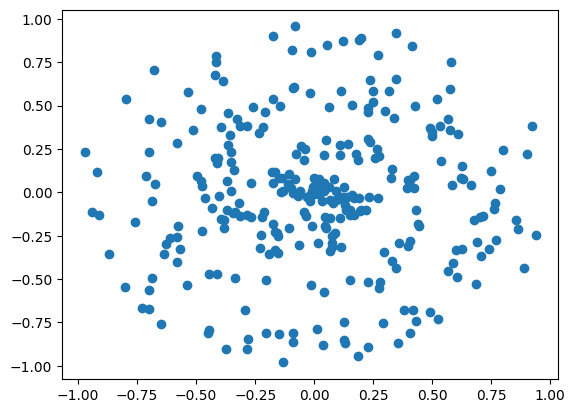

In [17]:
import matplotlib.pyplot as plt
from nnfs.datasets import spiral_data

X, y = spiral_data(samples=100, classes=3)

plt.scatter(X[:, 0], X[:, 1])
plt.show()


Resaltando por colores cada categoría se aprecia mejor su naturaleza:

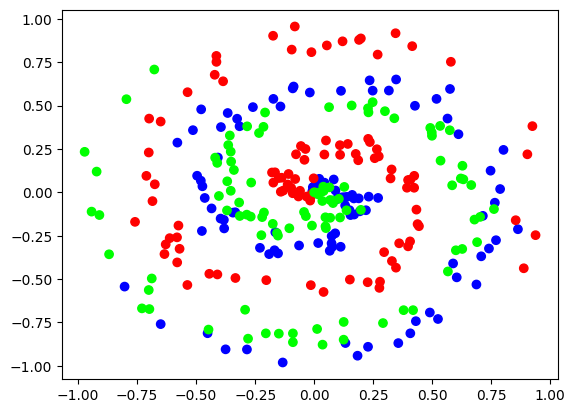

In [18]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='brg')
plt.show()

Realiza un *forward pass* de los datos de entrada ```X``` en una capa de 3 neuronas. 

In [ ]:
# SOL EJ 10

import nnfs
import numpy as np

# Set seed for reproducibility. Keep this!
nnfs.init()

, y = spiral_data(samples=100, classes=3)

dense1 = Layer_Dense(n_inputs = .shape[1],n_neurons=3)

dense1.forward(X)

print(dense1.output)
print(f"{len(dense1.output)=}")

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-1.04751882e-04  1.13953611e-04 -4.79834998e-05]
 [-2.74148420e-04  3.17291502e-04 -8.69217984e-05]
 [-4.21883655e-04  5.26662567e-04 -5.59126820e-05]
 [-5.77076804e-04  7.14014051e-04 -8.94304394e-05]
 [-3.54306976e-04  3.50254879e-04 -2.33634812e-04]
 [-8.92670010e-04  1.07678759e-03 -1.94532375e-04]
 [-9.33507807e-04  1.07238023e-03 -3.12273973e-04]
 [-1.12437585e-03  1.31128007e-03 -3.36296740e-04]
 [-1.33869553e-03  1.62009057e-03 -2.81017943e-04]
 [-1.48779724e-03  1.79484230e-03 -3.23859538e-04]
 [-1.20035873e-03  1.58119109e-03  8.65937000e-06]
 [-1.56528328e-03  1.99173321e-03 -1.30997345e-04]
 [-1.85718178e-03  2.30642664e-03 -2.70479388e-04]
 [-1.78093580e-03  2.27836682e-03 -1.24245722e-04]
 [-1.85300526e-03  2.38476763e-03 -1.00471654e-04]
 [-6.99865050e-04  1.11472746e-03  3.96097894e-04]
 [-2.19024252e-03  2.79446482e-03 -1.68075712e-04]
 [-1.69829139e-03  2.29598465e-03  1.31671681e-04]
 [-2.60229013e-03  3.27291898e-

## Ejercicio 11: Función de activación ReLU

Programa una clase llamada ```Activation_ReLU``` que implemente únicamente un método ```forward(self, inputs)```. Dicho método debe aplicar la función de activación ReLU a los inputs pasados como argumento.

<center>
<div>
<img src="https://drive.upm.es/index.php/apps/files_sharing/ajax/publicpreview.php?x=1920&y=457&a=true&file=relu.png&t=reweQCjpTXGOQZ4&scalingup=0" width="350"/>
</div>
</center>


In [20]:
# SOL EJ 11

class Activation_ReLU:

    def forward(self, inputs):
        self.output = np.maximum(0, inputs)

## Ejercicio 12: Función de activación ```Softmax```
El objetivo de este ejercicio es llegar a una clase llamada ```Activation_Softmax``` que implemente únicamente un método ```forward(self, inputs)```. Dicho método debe aplicar la función de activación Softmax a los inputs pasados como argumento. En teoría la función Softmax se formula como

$$
S_{i, j}=\frac{e^{z_{i, j}}}{\sum_{l=1}^L e^{z_{i, l}}}
$$
siendo los $z_j$ el output de la neurona $j$ (y por tanto, input de la función de activación). El índice $i$ hace referencia a la observación $i$ considerada. 

Para conseguir una implementación robusta, haremos alguna modificación en la formulación anterior. Siguie el siguiente proceso:


 - **12.a** Dada una única observación ```layer_outputs = [4.8, 1.21, 2.385]``` (se supone salida de una capa), aplica la función Softmax anterior (de momento, no es necesario que programes ninguna clase).

In [21]:
# SOL EJ 12a
layer_outputs = [4.8, 1.21, 2.385]

exp_values = np.exp(layer_outputs)
norm_values = exp_values / np.sum(exp_values)

print(norm_values)

[0.89528266 0.02470831 0.08000903]


 - **12.b** Dados los siguientes datos en lote, aplica la función Softmax a cada observación.

In [22]:
# SOL EJ 12b

layer_outputs = np.array([[4.8, 1.21, 2.385],
                            [8.9, -1.81, 0.2],
                            [1.41, 1.051, 0.026]])

exp_values = np.exp(layer_outputs)
norm_values = exp_values / np.sum(exp_values, axis=1, keepdims=True)
print(norm_values)

[[8.95282664e-01 2.47083068e-02 8.00090293e-02]
 [9.99811129e-01 2.23163963e-05 1.66554348e-04]
 [5.13097164e-01 3.58333899e-01 1.28568936e-01]]


 - **12.c** En el proceso de exponenciación anterior, resta al input considerado el máximo valor de dicha observación. Esto pretende evitar que los valores se disparen al exponenciar (*exloding values*). Así mismo, encapsula el código anterior en una clase ```Activation_Softmax``` que implemente únicamente un método: ```forward(self, inputs)```


In [23]:
# SOL EJ 12c

class Activation_Softmax:

    def forward(self, inputs):
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        self.output = exp_values / np.sum(exp_values, axis=1, keepdims=True)

## Ejercicio 13: *Forward pass* de una red con funciones de activación

Dado un conjunto de datos de entrada $X$, construye una red neuronal que conste de dos capas densas y funciones de activación ReLU y Softmax. El objetivo es realizar un *forward pass* a través de esta red. Los datos de entrada corresponde con los presentados en el ejercicio 10:

In [24]:
from nnfs.datasets import spiral_data

X, y = spiral_data(samples=100, classes=3)

La arquitectura de la red debe ser:
 - Input de dos features (las coordenadas de los puntos)
 - Hidden layer, con entrada de 2 valores y salida de 3. Función de activación ReLU.
 - Capa de salida, con entrada de 3 valores y salida también de 3 valores (correspondientes a las tres categorías del problema de clasificación). Función de activación Softmax.

Realiza un forward pass de los datos hasta la última función (softmax) e imprime por pantalla el output para las 5 primeras observaciones. Reutiliza las clases implementadas en ejercicios anteriores.

In [25]:
# SOL EJ 13

dense1 = Layer_Dense(2, 3)
activation1 = Activation_ReLU()

dense2 = Layer_Dense(3, 3)
activation2 = Activation_Softmax()

dense1.forward(X)
activation1.forward(dense1.output)
dense2.forward(activation1.output)
activation2.forward(dense2.output)

print(activation2.output[:5])


[[0.33333334 0.33333334 0.33333334]
 [0.33333334 0.33333334 0.33333334]
 [0.33333334 0.33333334 0.33333334]
 [0.33333334 0.33333334 0.33333334]
 [0.33333334 0.33333334 0.33333334]]


## Ejercicio 14: Función de pérdidas — entropía cruzada. Caso particular

Imagina que estamos tratando de clasificar entre las categorías "perro", "gato" o "humano". Un perro es la clase 0 (en el índice 0), un gato la clase 1 (índice 1) y un humano la clase 2 (índice 2). Supongamos que tenemos una arquitectura como la del ejercicio anterior y que tenemos un batch de tres observaciones, que han dado lugar a los siguientes valores de salida en la última capa:

In [26]:
softmax_outputs = np.array([[0.7, 0.1, 0.2],
                   [0.1, 0.5, 0.4],
                   [0.02, 0.9, 0.08]])


Recuerda que estos valroes representan la **confianza del modelo en cada clase**, para cada observación. Disponemos también de las etiquetas (valores objetivo) para estas tres observaciones: son un perro, un gato y un gato:

In [27]:
class_targets = [0, 1, 1] # perro, gato, gato

La fórmula para calcular la entropía cruzada categórica de *y* (distribución real/deseada) e *y-hat* (distribución predicha) es:
$$
L_i=-\sum_j y_{i, j} \log \left(\hat{y}_{i, j}\right)
$$
donde $L_i$ indica el valor de pérdida de la muestra, $i$ es la muestra $i$-ésima del conjunto, $j$ es la hace referencia al valor $j$-ésimo en la salida, $y$ son los valores objetivo (conocidos de antemano) e $\hat{y}$ son los valores predichos (salida de la red).

Calcula la entropía cruzada categórica para cada observación del batch anterior, así como una media para todo el batch.

In [28]:
# SOL EJ 14


probabilities_of_target = softmax_outputs[range(len(softmax_outputs)), class_targets]

negative_log_probs = -np.log(probabilities_of_target)

average_loss = np.mean(negative_log_probs)

print(probabilities_of_target, negative_log_probs, average_loss)

[0.7 0.5 0.9] [0.35667494 0.69314718 0.10536052] 0.38506088005216804


## Ejercicio 15: Función de pérdidas — entropía cruzada usando POO

Observa la siguiente clase abstracta:

In [29]:
from abc import ABC, abstractmethod
import numpy as np

class Loss(ABC):

    @abstractmethod
    def forward(self, output, y):
        pass

    def calculate(self, output, y):
        """
        Return sample losses (mean)
         - output: output of the last layer of the network
         - y: ground truth
        """
        sample_losses = self.forward(output, y)
        data_loss = np.mean(sample_losses)
        return data_loss

 - **15.a** A partir del ejercicio 14, implementa una clase llamada ```Loss_CategoricalCrossentropy``` que herede de la clase abstracta anterior e implemente el método ```forward```, para el caso de una función de pérdida tipo entropía cruzada categórica.

In [30]:
# SOL EJ 15a

class Loss_CategoricalCrossentropy(Loss):

    def forward(self, output, y):
        sample = len(output)

        y_pred_clipped = np.clip(output, 1e-7, 1 - 1e-7)  # evita inestabilidades en la evaluación del logaritmo

        correct_confidences = y_pred_clipped[range(sample), y]

        negative_log_probs = -np.log(correct_confidences)

        return negative_log_probs

 - **15.b** Repite el *forward pass* del ejercicio 13, pero incluye el cálculo final de la función de pérdidas usando la implementación anterior

In [31]:
# SOL EJ 15b

# <-- MODIFICA TU SOLUCIÓN DEL EJERCICIO 13

dense1 = Layer_Dense(2, 3)
activation1 = Activation_ReLU()

dense2 = Layer_Dense(3, 3)
activation2 = Activation_Softmax()



dense1.forward(X)
activation1.forward(dense1.output)
dense2.forward(activation1.output)
activation2.forward(dense2.output)

loss_function = Loss_CategoricalCrossentropy()
loss = loss_function.calculate(activation2.output, y)

print(loss)


1.098612


 - **15.c** Aunque la pérdida es una métrica útil para optimizar un modelo, hay otra métrica que se suele utilizar en la práctica junto con la pérdida: la *precisión*, que describe con qué frecuencia la mayor confianza corresponde a la clase correcta. Añade al código del apartado 'b' el cálculo de la precisión.

In [32]:
#!# PEDIDO
# SOL EJ 15c
class Loss_CategoricalCrossentropy_Accuracy(Loss):

    def forward(self, output, y):
        sample = len(output)

        y_pred_clipped = np.clip(output, 1e-7, 1 - 1e-7)  # evita inestabilidades en la evaluación del logaritmo

        correct_confidences = y_pred_clipped[range(sample), y]

        negative_log_probs = -np.log(correct_confidences)

        precision = correct_confidences/len(y)

        return negative_log_probs, precision

## Ejercicio 16: Optimización — modificación aleatoria de pesos (I)

Observa los siguientes datos de entrenamiento, que también definen un problema de clasificación multiclase, pero de una naturaleza más sencilla que el de la triple espiral visto hasta ahora

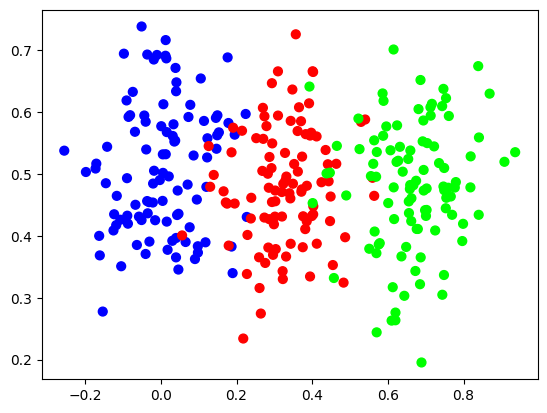

In [33]:
import matplotlib.pyplot as plt
import nnfs
from nnfs.datasets import vertical_data

nnfs.init()

X, y = vertical_data(samples=100, classes=3)

plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap='brg')
plt.show()



Utilizando la estructura computacional del ejercicio anterior, realiza un proceso iterativo (máximo 10000 iteraciones) en el que se vayan cambiando los pesos y sesgos de ambas capas de forma aleatoria (distribución normal de media 0 y varianza 0.05). Almacena el resultado que dé lugar a una menor pérdida. Comenta el decrecimiento de la función de pérdidas durante el proceso.

In [34]:
# SOL EJ 16
# Pista - usa 0.05 * np.random.randn para generar los arrays de números aleatorios que necesites
nnfs.init()

# Create dataset
X, y = vertical_data(samples=100, classes=3)

# Create model
dense1 = Layer_Dense(2, 3)
activation1 = Activation_ReLU()
dense2 = Layer_Dense(3, 3)
activation2 = Activation_Softmax()

# Create loss function
loss_function = Loss_CategoricalCrossentropy()

lowest_loss = np.inf
best_dense1_weights = dense1.weights.copy()
best_dense1_biases = dense1.biases.copy()
best_dense2_weights = dense2.weights.copy()
best_dense2_biases = dense2.biases.copy()

for iteration in range(10000):
    dense1.weights = np.random.randn(2,3) * 0.05
    dense1.biases = np.random.randn(1,3) * 0.05
    dense2.weights = np.random.randn(3,3) * 0.05
    dense2.biases = np.random.randn(1,3) * 0.05

    # Forward pass
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    activation2.forward(dense2.output)

    # Loss
    loss = loss_function.calculate(activation2.output, y)

    # Parameter update
    if loss < lowest_loss:
        print('New set of weights found, iteration:', iteration, 'loss:', loss)
        lowest_loss = loss

New set of weights found, iteration: 0 loss: 1.0986564
New set of weights found, iteration: 3 loss: 1.098138
New set of weights found, iteration: 117 loss: 1.0980115
New set of weights found, iteration: 124 loss: 1.0977516
New set of weights found, iteration: 165 loss: 1.0975711
New set of weights found, iteration: 552 loss: 1.0974693
New set of weights found, iteration: 778 loss: 1.0968257
New set of weights found, iteration: 4307 loss: 1.0965533
New set of weights found, iteration: 4615 loss: 1.0964499
New set of weights found, iteration: 9450 loss: 1.0964295


A pesar de que la perdida decrezca, esta no es muy practica ya que por una parte el decrecimiento es muy pequeño en comparacion con el tiempo invertido, y por otra este decrecimiento es bastante aleatorio y nada lineal

## Ejercicio 17: Optimización — modificación aleatoria de pesos (II)

 - **17.a** Repite el ejercicio anterior con un enfoque ligeramente distinto: en lugar de fijar nuevos parámetros elegios al azar en cada iteración, suma una fracción aleatoria (distribución normal de media 0 y varianza 0.05) a los parámetros actuales y comprueba si esos nuevos valores dan lugar a una pérdida menor. Comenta si este enfoque funciona mejor o peor que el anterior.


In [35]:
# SOL EJ 17a

# <- PEGA AQUÍ TU SOLUCIÓN DEL EJERCICIO 16 Y MODIFÍCALA SEGÚN CORRESPONDA

nnfs.init()

# Create dataset
X, y = vertical_data(samples=100, classes=3)

# Create model
dense1 = Layer_Dense(2, 3)
activation1 = Activation_ReLU()
dense2 = Layer_Dense(3, 3)
activation2 = Activation_Softmax()

# Create loss function
loss_function = Loss_CategoricalCrossentropy()

lowest_loss = np.inf
best_dense1_weights = dense1.weights.copy()
best_dense1_biases = dense1.biases.copy()
best_dense2_weights = dense2.weights.copy()
best_dense2_biases = dense2.biases.copy()

for iteration in range(10000):
    dense1.weights = best_dense1_weights + np.random.randn(2,3) * 0.05
    dense1.biases = best_dense1_biases + np.random.randn(1,3) * 0.05
    dense2.weights = best_dense2_weights + np.random.randn(3,3) * 0.05
    dense2.biases = best_dense2_biases + np.random.randn(1,3) * 0.05

    # Forward pass
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    activation2.forward(dense2.output)

    # Loss
    loss = loss_function.calculate(activation2.output, y)

    # Parameter update
    if loss < lowest_loss:
        print('New set of weights found, iteration:', iteration, 'loss:', loss)
        best_dense1_weights = dense1.weights.copy()
        best_dense1_biases = dense1.biases.copy()
        best_dense2_weights = dense2.weights.copy()
        best_dense2_biases = dense2.biases.copy()
        lowest_loss = loss
        

New set of weights found, iteration: 0 loss: 1.0987684
New set of weights found, iteration: 1 loss: 1.0987465
New set of weights found, iteration: 5 loss: 1.0976487
New set of weights found, iteration: 6 loss: 1.0972018
New set of weights found, iteration: 10 loss: 1.0938749
New set of weights found, iteration: 19 loss: 1.0935849
New set of weights found, iteration: 20 loss: 1.0908297
New set of weights found, iteration: 21 loss: 1.0905013
New set of weights found, iteration: 22 loss: 1.0879314
New set of weights found, iteration: 24 loss: 1.0856307
New set of weights found, iteration: 25 loss: 1.0801181
New set of weights found, iteration: 29 loss: 1.0725244
New set of weights found, iteration: 30 loss: 1.0724432
New set of weights found, iteration: 31 loss: 1.0636086
New set of weights found, iteration: 32 loss: 1.0599552
New set of weights found, iteration: 35 loss: 1.0583049
New set of weights found, iteration: 36 loss: 1.0570958
New set of weights found, iteration: 39 loss: 1.0469

Este metodo nos da unos valores de perdida mucho menores que el anterior. Esto se debe a que el metodo permite obtener unos valores de peso y bias diferentes al intervalo [-0.05,0.05], lo cual permite explorar mejores opciones. Ademas estos datos se comportan de tal manera que  continenen una direccion que conforme el algoritmo se va moviendo por esa direccion, va obteniendo valores menores.

 - **17.b** Prueba también este enfoque con los datos de la triple espiral.

In [36]:
# SOL EJ 17b
# pedidoHecho
# <- PEGA AQUÍ TU SOLUCIÓN DEL EJERCICIO 17a Y MODIFÍCALA SEGÚN CORRESPONDA
nnfs.init()

# Create dataset
X, y = spiral_data(samples=100, classes=3)

# Create model
dense1 = Layer_Dense(2, 3)
activation1 = Activation_ReLU()
dense2 = Layer_Dense(3, 3)
activation2 = Activation_Softmax()

# Create loss function
loss_function = Loss_CategoricalCrossentropy()

lowest_loss = np.inf
best_dense1_weights = dense1.weights.copy()
best_dense1_biases = dense1.biases.copy()
best_dense2_weights = dense2.weights.copy()
best_dense2_biases = dense2.biases.copy()

for iteration in range(10000):
    dense1.weights = best_dense1_weights + np.random.randn(2,3) * 0.05
    dense1.biases = best_dense1_biases + np.random.randn(1,3) * 0.05
    dense2.weights = best_dense2_weights + np.random.randn(3,3) * 0.05
    dense2.biases = best_dense2_biases + np.random.randn(1,3) * 0.05

    # Forward pass
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    activation2.forward(dense2.output)

    # Loss
    loss = loss_function.calculate(activation2.output, y)

    # Parameter update
    if loss < lowest_loss:
        print('New set of weights found, iteration:', iteration, 'loss:', loss)
        best_dense1_weights = dense1.weights.copy()
        best_dense1_biases = dense1.biases.copy()
        best_dense2_weights = dense2.weights.copy()
        best_dense2_biases = dense2.biases.copy()
        lowest_loss = loss
        

New set of weights found, iteration: 0 loss: 1.1008677
New set of weights found, iteration: 1 loss: 1.0994315
New set of weights found, iteration: 2 loss: 1.0991219
New set of weights found, iteration: 3 loss: 1.0986339
New set of weights found, iteration: 4 loss: 1.0986199
New set of weights found, iteration: 5 loss: 1.0984716
New set of weights found, iteration: 18 loss: 1.0983391
New set of weights found, iteration: 27 loss: 1.0982698
New set of weights found, iteration: 31 loss: 1.0982264
New set of weights found, iteration: 35 loss: 1.0979562
New set of weights found, iteration: 36 loss: 1.0977433
New set of weights found, iteration: 37 loss: 1.0976934
New set of weights found, iteration: 44 loss: 1.0975959
New set of weights found, iteration: 50 loss: 1.0973785
New set of weights found, iteration: 51 loss: 1.0959908
New set of weights found, iteration: 60 loss: 1.0959282
New set of weights found, iteration: 65 loss: 1.0954362
New set of weights found, iteration: 67 loss: 1.093989

## Ejercicio 18: Introducción a la *backpropagation*

La siguiente imagen corresponde a una simple neurona + f. activación, con 3 inputs. Los valores de inputs, pesos y sesgo se han fijado aleatoriamente. En la imagen también se indica en rojo el valor del gradiente recibido de una capa posterior (en este ejemplo, $1$):

<center>
<div>
<img src="https://drive.upm.es/index.php/apps/files_sharing/ajax/publicpreview.php?x=1920&y=457&a=true&file=capa_neuronas_simple_gradiente.png&t=nJHrGFJQ8VVuZK7&scalingup=0" width="500"/>
</div>
</center>

Pensemos en esta neurona como una gran función, cuyas variables independientes o parámetros de entrada son los inputs, pesos y sesgo. Esta gran función consiste en varias funciones más simples: hay una multiplicación de inputs y pesos, suma de estos valores y el sesgo, así como una la función activación ReLU - 3 funciones encadenadas en total:
$$
\operatorname{ReLU}\left(\operatorname{sum}\left(\operatorname{mul}\left(x_0, w_0\right), \operatorname{mul}\left(x_1, w_1\right), \operatorname{mul}\left(x_2, w_2\right), b\right)\right)
$$
Para calcular cómo afecta cada variable al resultado, debemos calcular sus derivadas parciales. Como hay varias funciones combinadas, debemos aplicar la regla de la cadena. 

Calcula cómo impacta en **el input $x_0$** el gradiente recibido, es decir:

$$
\begin{aligned}
& \frac{\partial}{\partial x_0}\left[\operatorname{ReLU}\left(\operatorname{sum}\left(\operatorname{mul}\left(x_0, w_0\right), \operatorname{mul}\left(x_1, w_1\right), \operatorname{mul}\left(x_2, w_2\right), b\right)\right)\right]
\end{aligned}
$$

In [37]:
# SOL EJ 18

w = [-3,-1,-2]
x = [1, -2, 3]
b = 1

dvalue = 1

input_relu = w[0] * x[0] + w[1] * x[1] + w[2] * x[2] + b
dL_dx0 = dvalue * (1.0 if input_relu > 0 else 0) * w[0]



## Ejercicio 19: Capa densa con *backpropagation*

Extiende la implementación que hiciste en el ejercicio 9, incluyendo un nuevo método llamado ```backward(self, dvalues)``` que implemente el backward pass (excluyendo la función de activación). El parámetro ```dvalues``` es una matriz donde cada fila se refiere a una observación del batch, y cada elemento de dicha fila es el gradiente llegado de aguas abajo. Dicho método debe calcular los valores ```self.dweights```, ```self.dbiases``` y ```self.dinputs``` que recogen las distintas derivadas parciales para cada parámetro. Presta atención a las dimensiones.

In [38]:
# SOL EJ 19

import numpy as np

class Layer_Dense:

    def __init__(self, n_inputs, n_neuronas):
        self.weights = 0.01 * np.random.randn(n_inputs, n_neuronas)
        self.biases = np.zeros((1, n_neuronas))

    def forward(self, inputs):
        self.inputs = inputs
        self.output = np.dot(inputs, self.weights) + self.biases

    def backward(self, dvalues):
        # Pista - para cuadrar las dimensiones en las multiplicaciones, recureda que:
        # - 'dvalues' tiene la misma dimensión que la salida de la capa: (batch_size (fila), n_neurons (columna))
        # - Cada gradiente debe tener las mismas dimensiones que los parámetros correspondientes: e.g. self.dweights debe tener las mismas dimensiones que las que tenía self.weights (recuerda que en este caso eran (n_inputs, n_neurons))

        self.dweights = np.dot(self.inputs.T,dvalues)

        self.dbiases = np.sum(dvalues, axis=0,keepdims=True)

        self.dinputs = np.dot(dvalues,self.weights.T)


## Ejercicio 20: ReLU con *backpropagation*

Extiende la implementación que hiciste en el ejercicio 11, incluyendo un nuevo método llamado ```backward(self, dvalues)``` que implemente el backward pass. El parámetro ```dvalues``` es el gradiente que le llega de capas posteriores. El método debe calcular los valores ```self.dinputs```.

In [39]:
# SOL EJ 20

class Activation_ReLU:

    def forward(self, inputs):

        self.inputs = inputs
        self.output = np.maximum(0, inputs)

    def backward(self, dvalues):
        self.dinputs = dvalues.copy()

        self.dinputs[self.inputs<=0] = 0.0

## Ejercicio 21: Función de pérdidas con *backpropagation*

Extiende la implementación que hiciste en el ejercicio 15, incluyendo un nuevo método llamado ```backward(self, dvalues, y_true)``` que implemente el backward pass. El parámetro ```dvalues``` son los valores predichos ($\hat{y}_{i,j}$) y ```y_true``` son los valores objetivo. El método debe calcular los valores ```self.dinputs```, el vector derivada respecto a los inputs. Ten en cuenta lo siguiente:
 - Debes convertir los ```y_true``` en *one-hot* vectors.
 - Una vez calcules la derivada según el desarrollo teórico, normaliza el resultado. Esto evitará problemas con muestras grandes en pasos posteriores. Simplemente divide el resultado final por la longitud de la muestra (```len(dvalues)```)

In [40]:
#!# PEDIDO
# SOL EJ 21
from abc import ABC, abstractmethod

# ya implementada más arriba, sin cambios, la dejo aquí también para que quede a mano

class Loss_CategoricalCrossentropy(Loss):  # ya estaba implementada

    # Copia aquí el método forward del ejercicio 15a
    def forward(self, output, y):
        sample = len(output)

        y_pred_clipped = np.clip(output, 1e-7, 1 - 1e-7)  # evita inestabilidades en la evaluación del logaritmo

        correct_confidences = y_pred_clipped[range(sample), y]

        negative_log_probs = -np.log(correct_confidences)

        return negative_log_probs

    def backward(self, y_hat, y_true):
        # Número de muestras -> obtenla apropiadamente de las dimensiones de y_hat
        samples = y_hat.shape[0]

        # Número de etiquetas en cada muestra -> obtenla apropiadamente de las dimensiones de y_hat. Se usará en la siguiente operación
        labels = len(y_hat[0])

        # y_true inicialmente es un array 1D de índices de clases, necesitamos convertirlo a vectores one-hot
        y_true = np.eye(labels)[y_true]

        # Calcula el gradiente directamente, aprovechando las propiedades de los arrays de numpy
        self.dinputs = -y_true / y_hat

        # Normaliza el gradiente
        self.dinputs = self.dinputs / samples


## Ejercicio 22: SoftMax con *backpropagation*

Se pretende extender la implementación que hiciste en el ejercicio 12, incluyendo un nuevo método llamado ```backward(self, dvalues)``` que implemente el backward pass. El parámetro ```dvalues``` es el gradiente que le llega de capas posteriores. El método debe calcular los valores ```self.dinputs```.
 - **22a.** Comienza calculando un caso particular. Supón que la salida de la función Softmax ha sido ```softmax_output = [0.7, 0.1, 0.2]```. El resultado debe ser una matriz (el Jacobiano) de dimensión $3x3$.

In [50]:
#!# PEDIDO
# SOL 22a

import numpy as np

single_output = np.array([0.7, 0.1, 0.2,])

# Inicializamos la matriz Jacobiana de 3x3
jacobian_matrix = np.zeros((3, 3))

# Calculamos las derivadas parciales para cada par (i, j)
for i in range(3):
    for j in range(3):
        if i == j:
            jacobian_matrix[i, j] = single_output[i] * (1 - single_output[i])
        else:
            jacobian_matrix[i, j] = -single_output[i] * single_output[j]

print(jacobian_matrix)

[[ 0.21 -0.07 -0.14]
 [-0.07  0.09 -0.02]
 [-0.14 -0.02  0.16]]


 - **22b.** Generaliza el código anterior. Extiende la clase del ejercicio 12 con el método llamado ```backward(self, dvalues)```. A continuación se incluye una plantilla de desarrollo que debe ser completada. Recuerda copiar el resto de métodos de la clase.

In [51]:
#!# pedidoHecho
# SOL 22b

class Activation_Softmax:

    def forward(self, inputs):
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        self.output = exp_values / np.sum(exp_values, axis=1, keepdims=True)

    # Paso hacia atrás
    def backward(self, dvalues):
        # Crear un array no inicializado con la misma dimensión que dvalues
        self.dinputs = np.empty_like(dvalues)

        # Enumerar salidas y gradientes
        for index, (single_output, single_dvalues) in enumerate(zip(self.output, dvalues)):
            # Aplanar el array de salida - usa 'reshape'
            single_output = single_output.reshape(-1, 1)

            # Calcular la matriz Jacobiana de la salida
            jacobian_matrix = np.diagflat(single_output) - np.dot(single_output, single_output.T)

            # Calcular el gradiente por muestra y añadirlo al array de gradientes por muestra
            self.dinputs[index] = np.dot(jacobian_matrix, single_dvalues)


## Ejercicio 23: Softmax + entropía cruzada

Al calcular juntas las derivadas de la función Softmax y la función de pérdidas de entropía cruzada categórica, los cáluclos se simplifican notablemente. Implementa el método que hace el *backward pass* (i.e. ```backward(self, dvalues, y_true)```) de nueva clase llamada ```Activation_Softmax_Loss_CategoricalCrossentropy``` (el resto de métodos se dan ya implementados). Recuerda normalizar el resultado dividiéndolo por el número de muestras (```len(dvalues)```) para evitar problemas en pasos futuros.

In [52]:
# SOL EJ 23

class Activation_Softmax_Loss_CategoricalCrossentropy:

    def __init__(self):
        self.activation = Activation_Softmax()
        self.loss = Loss_CategoricalCrossentropy()

    def forward(self, inputs, y_true):
        self.activation.forward(inputs)

        self.output = self.activation.output
        return self.loss.calculate(self.output, y_true)

    def backward(self, y_hat, y_true):
        samples = len(y_hat)

        self.dinputs = y_hat.copy()

        self.dinputs[range(samples), y_true] -= 1

        # Normalization -> para evitar "valores explosivos"
        self.dinputs = self.dinputs / samples


## Ejercicio 24: Comprobación Softmax + entropía cruzada

Se pretende comprobar si el *backpropagation* combinado (Softmax + entropía cruzada) devuelve los mismos valores en comparación con cuando retropropagamos gradientes a través de ambas funciones por separado. Para este ejemplo, vamos a crear una salida de la función Softmax y algunos valores objetivo. Retropropágalos utilizando ambas soluciones, y comprueba que obtienes los mismos resultados

In [53]:
#!# pedidoHecho
# SOL EJ 24

import numpy as np
import nnfs

nnfs.init()

# Valores de ejemplo: salidas de la función Softmax y etiquetas de clase objetivo
softmax_outputs = np.array([[0.7, 0.1, 0.2],
                            [0.1, 0.5, 0.4],
                            [0.02, 0.9, 0.08]])
class_targets = np.array([0, 1, 1])

# Método Combinando Softmax y entropía cruzada en un solo objeto
softmax_loss = Activation_Softmax_Loss_CategoricalCrossentropy()
softmax_loss.backward(softmax_outputs, class_targets)
dinputs_combined = softmax_loss.dinputs

# Método separando Softmax y entropía cruzada
activation = Activation_Softmax()
loss = Loss_CategoricalCrossentropy()
activation.output = softmax_outputs
loss.backward(activation.output, class_targets)
activation.backward(loss.dinputs)
dinputs_separate = activation.dinputs

# Imprimir los gradientes obtenidos
print(f'Gradients: combined loss and activation: {dinputs_combined}')
print(f'Gradients: separate loss and activation: {dinputs_separate}')


Gradients: combined loss and activation: [[-0.1         0.03333333  0.06666667]
 [ 0.03333333 -0.16666667  0.13333333]
 [ 0.00666667 -0.03333333  0.02666667]]
Gradients: separate loss and activation: [[-0.09999999  0.03333334  0.06666667]
 [ 0.03333334 -0.16666667  0.13333334]
 [ 0.00666667 -0.03333333  0.02666667]]


## Ejercicio 25: *Backward pass* de toda la red

Realiza un *backward pass* de la red que usaste en el ejercicio *15b*. 

In [54]:
# SOL EJ 25

# Definición arquitectura de la red
dense1 = Layer_Dense(2, 3)
activation1 = Activation_ReLU()
dense2 = Layer_Dense(3, 3)
loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()

# Forward pass
dense1.forward(X)
activation1.forward(dense1.output)
dense2.forward(activation1.output)
loss = loss_activation.forward(dense2.output, y)

print(f"Pérdidas = {loss}")

# Backward pass
loss_activation.backward(loss_activation.output, y)
dense2.backward(loss_activation.dinputs)
activation1.backward(dense2.dinputs)
dense1.backward(activation1.dinputs)

print(dense1.dweights)

Pérdidas = 1.0986136198043823
[[-1.5735535e-05  6.1952458e-05  1.4190499e-05]
 [ 7.0554065e-06  1.0230539e-04  8.9116853e-05]]


## Ejercicio 26: Optimizador — Descenso del gradiente

Programa una clase llamada ```Optimizer_SGD``` que implemente el optimizador de descenso de gradiente. Pasa a su constructor un parámetro ```learning_rate``` por defecto de $1$. Dicha clase deberá contener un único método llamado ```update_params(layer)``` al que se le pase una capa y aplique sus correspondientes gradientes a la actualización de sus parámetros.

In [55]:
# SOL EJ 26

class Optimizer_SGD:

    def __init__(self, learning_rate=1.0):
        self.learning_rate = learning_rate

    def update_params(self, layer):
        layer.weights += -self.learning_rate * layer.dweights
        layer.biases += -self.learning_rate * layer.dbiases

## Ejercicio 27: Optimización sobre el caso de la triple espiral

Partiendo del código al que llegaste en el ejercicio 25, añade un optimizador que actualice los parámetros de la red. Realiza 10000 iteraciones (*epoch*). Observa como evoluciona la precisión y las pérdidas a lo largo del entrenamiento. De ahora en adelante utiliza una arquitectura con 64 neuronas por capa

epoca : 0, perdidas = 1.098594307899475
epoca : 100, perdidas = 1.0869206190109253
epoca : 200, perdidas = 1.0773380994796753
epoca : 300, perdidas = 1.0760209560394287
epoca : 400, perdidas = 1.074236273765564
epoca : 500, perdidas = 1.0713080167770386
epoca : 600, perdidas = 1.0673632621765137
epoca : 700, perdidas = 1.0623551607131958
epoca : 800, perdidas = 1.0550928115844727
epoca : 900, perdidas = 1.0638744831085205
epoca : 1000, perdidas = 1.0622682571411133
epoca : 1100, perdidas = 1.061262607574463
epoca : 1200, perdidas = 1.0605604648590088
epoca : 1300, perdidas = 1.0517452955245972
epoca : 1400, perdidas = 1.105523943901062
epoca : 1500, perdidas = 1.0429925918579102
epoca : 1600, perdidas = 1.0630847215652466
epoca : 1700, perdidas = 1.0433818101882935
epoca : 1800, perdidas = 1.0381176471710205
epoca : 1900, perdidas = 1.0248881578445435
epoca : 2000, perdidas = 1.0371609926223755
epoca : 2100, perdidas = 1.0216883420944214
epoca : 2200, perdidas = 1.0195891857147217
epoc

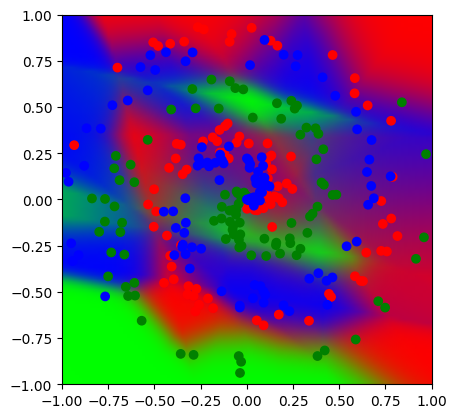

In [56]:
#SOL 27

nnfs.init()

X, y = spiral_data(samples=100, classes=3)

dense1 = Layer_Dense(2, 64)
activation1 = Activation_ReLU()

dense2 = Layer_Dense(64, 3)
loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()

optimizer = Optimizer_SGD()

for epoch in range(10000):
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    loss = loss_activation.forward(dense2.output,y)

    if epoch % 100 == 0:
        print(f"epoca : {epoch}, perdidas = {loss}")

    # Backward
    loss_activation.backward(loss_activation.output,y)
    dense2.backward(loss_activation.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    # actualizacion de parametros
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)


# Este código a continuación te ayudará a visualizar los resultados de la red
# (asegúrate que el la lista 'model' contiene los mismo nombres para las
# distintas capas, y si no es así actualiza dicha variable con el naming usado)
model = [dense1, activation1, dense2, loss_activation]
num_points = 100
plot_prediction_performance_spiral(model, X, y, num_points)

## Ejercicio 28: Misma solución utilizando ```keras```

Busca documentación sobre cómo implementar redes neuronales con el módulo ```tf.keras``` (echa un vistazo por ejemplo a [este enlace](https://stackoverflow.com/questions/64689483/how-to-do-multiclass-classification-with-keras), o [este otro](https://machinelearningmastery.com/multi-class-classification-tutorial-keras-deep-learning-library/)). Crear una arquitectura similar a la usada en el ejercicio anterior, directamente usando las herramientas disponibles en dicho paquete. 

In [57]:
#!# pedidoHecho
# SOL EJ 28
import tensorflow as tf
import keras

model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X, tf.keras.utils.to_categorical(y, num_classes=3), epochs=1000, verbose=1)

Epoch 1/1000


c:\Users\lluis\anaconda3\envs\Master\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2859 - loss: 1.1124
Epoch 2/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3130 - loss: 1.1028
Epoch 3/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3667 - loss: 1.1000 
Epoch 4/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4450 - loss: 1.0957
Epoch 5/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4187 - loss: 1.0959
Epoch 6/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4081 - loss: 1.0917 
Epoch 7/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3770 - loss: 1.1002
Epoch 8/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3944 - loss: 1.0969 
Epoch 9/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3962 - loss: 1.0896   
Epoch 10/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3951 - loss: 1.0926 
Epoch 11/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3977 - loss: 1.0848
Epoch 12/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 946us/step - a

## Ejercicio 29: *Learning rate decay*

 - **29.a** Extiende la implementación de la clase ```Optimizer_SGD``` que hiciste en el ejercicio 26 para que incluya un mecanismo que aplique el decaimiento de la tasa de aprendizaje. Ahora, además del argumento ```learning_rate```, el constructor de la clase recibirá el ```decay```. En dicho constructor, inicializa también dos variables adicionales: ```self.current_learning_rate``` (para ir almacenando el *learning rate* en sucesivas iteraciones) y ```self.iterations``` (para ir almacenando el número de iteraciones). Actualiza el método ```update_params``` e implementa dos nuevos métodos: 
   - ```pre_update_params(self)```: responsable de actualizar ```self.current_learning_rate```. Está pensado para será ejecutado justo antes de la llamada a ```update_params```.
   - ```post_update_params(self)```: responsable de actualizar ```self.iterations```. Está pensado para será ejecutado justo después de la llamada a ```update_params```.


In [58]:
# SOL EJ 29a

class Optimizer_SGD:

    def __init__(self, learning_rate=1.0, decay=0.0):
        self.learning_rate = learning_rate
        self.decay = decay
        self.current_learning_rate = learning_rate
        self.iterations = 0

    def pre_update_params(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate / (1.0 + self.decay * self.iterations)

    def update_params(self, layer):
        layer.weights += -self.learning_rate * layer.dweights
        layer.biases += -self.learning_rate * layer.dbiases

    def post_update_params(self):
        self.iterations += 1

  - **29.b** Partiendo del código al que llegaste en el ejercicio 27, prueba el mecanismo de *Learning rate decay* que acabas de implementar. Experimenta con un *decay* de $10^{-2}$ y de $10^{-3}$ ¿Se mejoran los resultados en comparación con los que obtuviste en el ejercicio 27? Recuerda visiualizar los resultados como se explica en el ejercicio 27.

epoca : 0, perdidas = 1.098594307899475
epoca : 100, perdidas = 1.0869206190109253
epoca : 200, perdidas = 1.0773380994796753
epoca : 300, perdidas = 1.0760209560394287
epoca : 400, perdidas = 1.074236273765564
epoca : 500, perdidas = 1.0713080167770386
epoca : 600, perdidas = 1.0673632621765137
epoca : 700, perdidas = 1.0623551607131958
epoca : 800, perdidas = 1.0550928115844727
epoca : 900, perdidas = 1.0638744831085205
epoca : 1000, perdidas = 1.0622682571411133
epoca : 1100, perdidas = 1.061262607574463
epoca : 1200, perdidas = 1.0605604648590088
epoca : 1300, perdidas = 1.0517452955245972
epoca : 1400, perdidas = 1.105523943901062
epoca : 1500, perdidas = 1.0429925918579102
epoca : 1600, perdidas = 1.0630847215652466
epoca : 1700, perdidas = 1.0433818101882935
epoca : 1800, perdidas = 1.0381176471710205
epoca : 1900, perdidas = 1.0248881578445435
epoca : 2000, perdidas = 1.0371609926223755
epoca : 2100, perdidas = 1.0216883420944214
epoca : 2200, perdidas = 1.0195891857147217
epoc

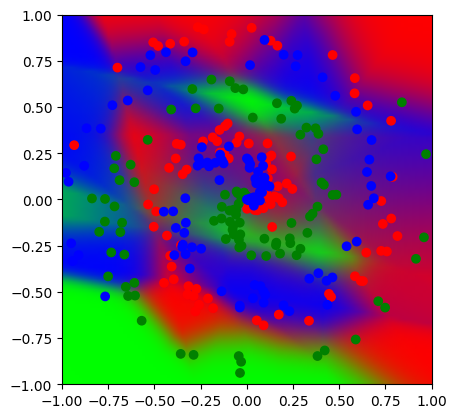

In [59]:
# SOL EJ 29b


nnfs.init()

X, y = spiral_data(samples=100, classes=3)

dense1 = Layer_Dense(2, 64)
activation1 = Activation_ReLU()

dense2 = Layer_Dense(64, 3)
loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()

optimizer = Optimizer_SGD(decay= 1e-2)

for epoch in range(10000):
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    loss = loss_activation.forward(dense2.output,y)

    if epoch % 100 == 0:
        print(f"epoca : {epoch}, perdidas = {loss}")

    # Backward
    loss_activation.backward(loss_activation.output,y)
    dense2.backward(loss_activation.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    # actualizacion de parametros
    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.post_update_params()


# Este código a continuación te ayudará a visualizar los resultados de la red
# (asegúrate que el la lista 'model' contiene los mismo nombres para las
# distintas capas, y si no es así actualiza dicha variable con el naming usado)
model = [dense1, activation1, dense2, loss_activation]
num_points = 100
plot_prediction_performance_spiral(model, X, y, num_points)


## Ejercicio 30: Descenso de gradiente con momentum

 - **30.a** Extiende la implementación de la clase ```Optimizer_SGD``` que hiciste en el ejercicio 29 para que incluya el mecanismo de *momentum*. Sigue la siguiente plantilla de desarrollo:

In [60]:
# SOL EJ 30a -> completa las líneas con ######

# Optimizador SGD con momentum
class Optimizer_SGD:

    def __init__(self, learning_rate=1., decay=0., momentum=0.):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.momentum = momentum

    def pre_update_params(self):
        self.current_learning_rate = self.learning_rate / (1.0 + self.decay * self.iterations)

    def update_params(self, layer):

        # Si usamos momentum, creamos arrays de momentum si no existen. Inicializados en ceros
        if self.momentum:
            if not hasattr(layer, 'weight_momentums'):
                layer.weight_momentums = np.zeros_like(layer.weights)
                layer.bias_momentums = np.zeros_like(layer.biases)

            # Calcular actualizaciones de pesos y sesgos con momentum
            weight_updates = self.momentum * layer.weight_momentums - self.current_learning_rate * layer.dweights
            layer.weight_momentums = weight_updates

            bias_updates = self.momentum * layer.bias_momentums - self.current_learning_rate * layer.dbiases
            layer.bias_momentums = bias_updates

        # Calcular actualizaciones de pesos y sesgos sin momentum (como en ejercicios anteriores)
        else:

            weight_updates = -self.learning_rate * layer.dweights
            bias_updates = -self.learning_rate * layer.dbiases

        # Actualizar pesos y sesgos usando actualizaciones con o sin momentum
        layer.weights += weight_updates
        layer.biases += bias_updates


    def post_update_params(self):
        self.iterations += 1

  - **30.b** Partiendo del código al que llegaste en el ejercicio 29, prueba el mecanismo de momentum que acabas de implementar. Probar con un *decay* de $10^{-3}$ y un *momentum* de $0.5$ y luego de $0.9$. ¿Se mejoran los resultados en comparación con los que obtuviste en el ejercicio 29? Recuerda visiualizar los resultados como se explica en el ejercicio 27.

epoca : 0, perdidas = 1.098594307899475
epoca : 100, perdidas = 1.0804091691970825
epoca : 200, perdidas = 1.077021837234497
epoca : 300, perdidas = 1.076348900794983
epoca : 400, perdidas = 1.0758647918701172
epoca : 500, perdidas = 1.075315237045288
epoca : 600, perdidas = 1.074745774269104
epoca : 700, perdidas = 1.0741337537765503
epoca : 800, perdidas = 1.073522686958313
epoca : 900, perdidas = 1.0729305744171143
epoca : 1000, perdidas = 1.0723531246185303
epoca : 1100, perdidas = 1.0717853307724
epoca : 1200, perdidas = 1.0712628364562988
epoca : 1300, perdidas = 1.0707802772521973
epoca : 1400, perdidas = 1.0703275203704834
epoca : 1500, perdidas = 1.069881558418274
epoca : 1600, perdidas = 1.0694551467895508
epoca : 1700, perdidas = 1.0690609216690063
epoca : 1800, perdidas = 1.0686155557632446
epoca : 1900, perdidas = 1.0681215524673462
epoca : 2000, perdidas = 1.067664384841919
epoca : 2100, perdidas = 1.0672558546066284
epoca : 2200, perdidas = 1.0668562650680542
epoca : 230

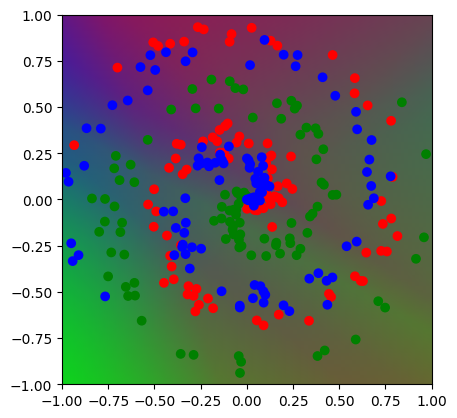

In [61]:
#pedidoHecho
# SOL EJ 30b

nnfs.init()

X, y = spiral_data(samples=100, classes=3)

dense1 = Layer_Dense(2, 64)
activation1 = Activation_ReLU()

dense2 = Layer_Dense(64, 3)
loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()

optimizer = Optimizer_SGD(decay= 1e-2, momentum= 0.5)

for epoch in range(10000):
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    loss = loss_activation.forward(dense2.output,y)

    if epoch % 100 == 0:
        print(f"epoca : {epoch}, perdidas = {loss}")

    # Backward
    loss_activation.backward(loss_activation.output,y)
    dense2.backward(loss_activation.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    # actualizacion de parametros
    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.post_update_params()


# Este código a continuación te ayudará a visualizar los resultados de la red
# (asegúrate que el la lista 'model' contiene los mismo nombres para las
# distintas capas, y si no es así actualiza dicha variable con el naming usado)
model = [dense1, activation1, dense2, loss_activation]
num_points = 100
plot_prediction_performance_spiral(model, X, y, num_points)


## Ejercicio 31: RMS Prop

 - **31.a** Partiendo de la clase que implementaste en el ejercicio anterior, programa una nueva clase llamada ```Optimizer_RMSprop``` que implemente este optimizador. RMSProp utiliza una media móvil de la caché:

    ```python
    cache = rho * cache + (1 - rho) * gradient ** 2
    ```

    Que luego se usará en la actualización de cada parámetro individual como:

    ```python
    parm_updates = learning_rate * parm_gradient / (sqrt(cache) + eps)
    ```
    Sigue la siguiente plantilla de desarrollo:

In [62]:
# <-! pedidoHecho
# SOL EJ 31a

# RMSprop con momentum
class Optimizer_RMSprop:

    def __init__(self, learning_rate=0.001, decay=0., epsilon=1e-7, rho=0.9):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.epsilon = epsilon
        self.rho = rho

    def pre_update_params(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate / (1.0 + self.decay * self.iterations)

    # Actualizar parámetros usando RMSprop con momentum
    def update_params(self, layer):
        # Si los arrays de caché no existen, crearlos llenos de ceros
        if not hasattr(layer, 'weight_cache'):
            layer.weight_cache = np.zeros_like(layer.weights)
            layer.bias_cache = np.zeros_like(layer.biases)

        # Actualizar la caché con los gradientes actuales al cuadrado
        layer.weight_cache = self.rho * layer.weight_cache + (1 - self.rho) * layer.dweights**2
        layer.bias_cache = self.rho * layer.bias_cache + (1 - self.rho) * layer.dbiases**2

        # Actualizar pesos y sesgos usando RMSprop con momentum
        layer.weights += -self.current_learning_rate * layer.dweights / (np.sqrt(layer.weight_cache) + self.epsilon)
        layer.biases += -self.current_learning_rate * layer.dbiases / (np.sqrt(layer.bias_cache) + self.epsilon)

    def post_update_params(self):
        self.iterations += 1


  - **31.b** Partiendo del código al que llegaste en el ejercicio 30, prueba el optimizador que acabas de implementar. Prueba primero con un *decay* de $10^{-4}$ y el resto de parámetros por defecto. Prueba luego con ```learning_rate=0.02, decay=1e-5, rho=0.999``` ¿Se consigue mejorar los resultados en comparación con los del ejercicio 30? Recuerda visiualizar los resultados como se explica en el ejercicio 27.

epoca : 0, perdidas = 1.098594307899475
epoca : 100, perdidas = 1.0774517059326172
epoca : 200, perdidas = 1.0716205835342407
epoca : 300, perdidas = 1.062160611152649
epoca : 400, perdidas = 1.0509488582611084
epoca : 500, perdidas = 1.0360888242721558
epoca : 600, perdidas = 1.0209324359893799
epoca : 700, perdidas = 1.0057893991470337
epoca : 800, perdidas = 0.9907599091529846
epoca : 900, perdidas = 0.9758990406990051
epoca : 1000, perdidas = 0.9613081812858582
epoca : 1100, perdidas = 0.9483176469802856
epoca : 1200, perdidas = 0.9365929961204529
epoca : 1300, perdidas = 0.9259381294250488
epoca : 1400, perdidas = 0.9164244532585144
epoca : 1500, perdidas = 0.9075927734375
epoca : 1600, perdidas = 0.8997896313667297
epoca : 1700, perdidas = 0.8927996754646301
epoca : 1800, perdidas = 0.8862743377685547
epoca : 1900, perdidas = 0.8802488446235657
epoca : 2000, perdidas = 0.8744475245475769
epoca : 2100, perdidas = 0.8685599565505981
epoca : 2200, perdidas = 0.8627159595489502
epoca

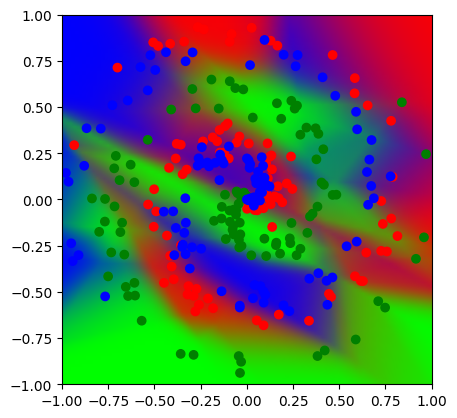

In [ ]:
# SOL EJ 31b
#pedidoHecho
# <- PEGA AQUÍ TU SOLUCIÓN DEL EJERCICIO 30b Y MODIFÍCALA SEGÚN CORRESPONDA
#pedidoHecho
# SOL EJ 30b

nnfs.init()

X, y = spiral_data(samples=100, classes=3)

dense1 = Layer_Dense(2, 64)
activation1 = Activation_ReLU()

dense2 = Layer_Dense(64, 3)
loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()

# optimizer = Optimizer_SGD(decay= 1e-2, momentum= 0.5)
optimizer = Optimizer_RMSprop( decay=1e-4)
optimizer2 = Optimizer_RMSprop(learning_rate=0.02, decay=1e-5, rho=0.999)

for epoch in range(10000):
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    loss = loss_activation.forward(dense2.output,y)

    if epoch % 100 == 0:
        print(f"epoca : {epoch}, perdidas = {loss}")

    # Backward
    loss_activation.backward(loss_activation.output,y)
    dense2.backward(loss_activation.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    # actualizacion de parametros
    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.post_update_params()


# Este código a continuación te ayudará a visualizar los resultados de la red
# (asegúrate que el la lista 'model' contiene los mismo nombres para las
# distintas capas, y si no es así actualiza dicha variable con el naming usado)
model = [dense1, activation1, dense2, loss_activation]
num_points = 100
plot_prediction_performance_spiral(model, X, y, num_points)


epoca : 0, perdidas = 0.6659124493598938
epoca : 100, perdidas = 1.0994904041290283
epoca : 200, perdidas = 0.9511928558349609
epoca : 300, perdidas = 0.9146556854248047
epoca : 400, perdidas = 0.8754767775535583
epoca : 500, perdidas = 0.8247172832489014
epoca : 600, perdidas = 0.8048307299613953
epoca : 700, perdidas = 0.8082453012466431
epoca : 800, perdidas = 0.8106337785720825
epoca : 900, perdidas = 0.8102290034294128
epoca : 1000, perdidas = 0.7651660442352295
epoca : 1100, perdidas = 0.7847897410392761
epoca : 1200, perdidas = 0.7710469365119934
epoca : 1300, perdidas = 0.73770672082901
epoca : 1400, perdidas = 0.6875677704811096
epoca : 1500, perdidas = 0.7095000147819519
epoca : 1600, perdidas = 0.6548097729682922
epoca : 1700, perdidas = 0.6645939946174622
epoca : 1800, perdidas = 0.6639845967292786
epoca : 1900, perdidas = 0.6277517080307007
epoca : 2000, perdidas = 0.6506257057189941
epoca : 2100, perdidas = 0.6183564066886902
epoca : 2200, perdidas = 0.6231874823570251
ep

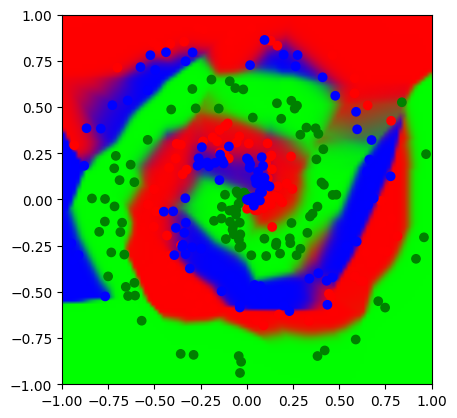

In [64]:
for epoch in range(10000):
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    loss = loss_activation.forward(dense2.output,y)

    if epoch % 100 == 0:
        print(f"epoca : {epoch}, perdidas = {loss}")

    # Backward
    loss_activation.backward(loss_activation.output,y)
    dense2.backward(loss_activation.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    # actualizacion de parametros
    optimizer2.pre_update_params()
    optimizer2.update_params(dense1)
    optimizer2.update_params(dense2)
    optimizer2.post_update_params()


# Este código a continuación te ayudará a visualizar los resultados de la red
# (asegúrate que el la lista 'model' contiene los mismo nombres para las
# distintas capas, y si no es así actualiza dicha variable con el naming usado)
model = [dense1, activation1, dense2, loss_activation]
num_points = 100
plot_prediction_performance_spiral(model, X, y, num_points)

Los resultados mejoran bastante ya que pasamos a tener una *loss* superior de 1 a aproximadamente 0.6 y 0.28 en los dos respectivos casos. Sobre todo en el segundo caso (learning_rate=0.02, decay=1e-5, rho=0.999) donde se ve perfectamente en la gráfica que las espirales se adaptan muy bien a las distribuciones de puntos

## Ejercicio 32: Adam

 - **32.a** Partiendo de la clase que implementaste en el ejercicio anterior, programa una nueva clase llamada ```Optimizer_Adam``` que implemente este optimizador. Adam añade a RMSProp el mecanismo de momentum ($\beta_1$). También añade además un mecanismo de corrección de sesgo, dividiendo tanto el momentum como el caché por $1-\beta_1^{step}$.

In [65]:
# SOL EJ 32a

# Optimizador Adam
class Optimizer_Adam:

    # Inicializar el optimizador - establecer configuraciones
    def __init__(self, learning_rate=0.001, decay=0., epsilon=1e-7, beta_1=0.9, beta_2=0.999):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.epsilon = epsilon
        self.beta_1 = beta_1  # momentum, y para la corrección descrita arriba
        self.beta_2 = beta_2  # renombrar el antiguo rho de RMSProp -> usado para la caché

    def pre_update_params(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate / (1.0 + self.decay * self.iterations)

    def update_params(self, layer):

        # Si la capa no contiene arrays de caché, crearlos llenos de ceros
        if not hasattr(layer, 'weight_cache'):
            layer.weight_momentums = np.zeros_like(layer.weights)
            layer.weight_cache = np.zeros_like(layer.weights)
            layer.bias_momentums = np.zeros_like(layer.biases)
            layer.bias_cache = np.zeros_like(layer.biases)

        # Actualizar el momentum con los gradientes actuales
        layer.weight_momentums = self.beta_1 * layer.weight_momentums + (1.0 - self.beta_1) * layer.dweights #m_t
        layer.bias_momentums = self.beta_1 * layer.bias_momentums + (1.0 - self.beta_1) * layer.dbiases #m_t

        # Actualizar la caché con los gradientes actuales al cuadrado
        layer.weight_cache = self.beta_2 * layer.weight_cache + (1.0 - self.beta_2) * layer.dweights**2 # v_t
        layer.bias_cache = self.beta_2 * layer.bias_cache + (1.0 - self.beta_2) * layer.dbiases**2 # v_t


        # Obtener el momentum y la caché corregidos (self.iteration es 0 en el primer paso, y necesitamos empezar con 1 aquí) -> así que dividir por (1 - self.beta_1 ** (self.iterations + 1))
        weight_momentums_corrected = layer.weight_momentums / (1.0 - self.beta_1**(self.iterations + 1)) # m_hat
        bias_momentums_corrected = layer.bias_momentums / (1.0 - self.beta_1**(self.iterations + 1)) # m_hat
        weight_cache_corrected = layer.weight_cache / (1.0 - self.beta_2**(self.iterations + 1)) # v_hat
        bias_cache_corrected = layer.bias_cache / (1.0 - self.beta_2**(self.iterations + 1)) # v_hat

        # Actualización de parámetros de SGD + normalización con la caché enraizada
        layer.weights += -self.current_learning_rate * weight_momentums_corrected / (np.sqrt(weight_cache_corrected) + self.epsilon)
        layer.biases += -self.current_learning_rate * bias_momentums_corrected / (np.sqrt(bias_cache_corrected) + self.epsilon)

    def post_update_params(self):
            self.iterations += 1

  - **32.b** Partiendo del código al que llegaste en el ejercicio 31, prueba el optimizador que acabas de implementar. Prueba primero con ```Optimizer_Adam(learning_rate=0.02, decay=1e-5)```, y luego con ```Optimizer_Adam(learning_rate=0.05, decay=5e-7)```. ¿Se consigue mejorar los resultados en comparación con los del ejercicio 31? Recuerda visiualizar los resultados como se explica en el ejercicio 27.

epoca : 0, perdidas = 1.098594307899475, accuracy = 0.36
epoca : 100, perdidas = 0.7691511511802673, accuracy = 0.6733333333333333
epoca : 200, perdidas = 0.5516485571861267, accuracy = 0.8133333333333334
epoca : 300, perdidas = 0.4452868700027466, accuracy = 0.84
epoca : 400, perdidas = 0.3801632821559906, accuracy = 0.8633333333333333
epoca : 500, perdidas = 0.33563119173049927, accuracy = 0.8733333333333333
epoca : 600, perdidas = 0.3084203004837036, accuracy = 0.89
epoca : 700, perdidas = 0.28723517060279846, accuracy = 0.89
epoca : 800, perdidas = 0.2691740393638611, accuracy = 0.9066666666666666
epoca : 900, perdidas = 0.2498081922531128, accuracy = 0.91


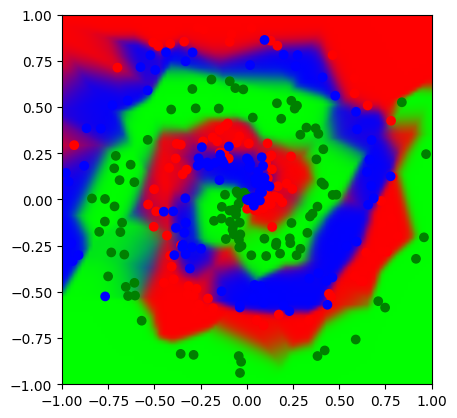

In [66]:
# SOL EJ 32b

# SOL EJ 30b

nnfs.init()

X, y = spiral_data(samples=100, classes=3)

dense1 = Layer_Dense(2, 64)
activation1 = Activation_ReLU()

dense2 = Layer_Dense(64, 3)
loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()

optimizer = Optimizer_Adam(learning_rate=0.02, decay= 1e-5)

for epoch in range(1000):
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    loss = loss_activation.forward(dense2.output,y)

    # Calculo de accuracy
    predictions = np.argmax(loss_activation.output,axis = 1)
    accuracy = np.mean(predictions == y)

    if epoch % 100 == 0:
        print(f"epoca : {epoch}, perdidas = {loss}, accuracy = {accuracy}")

    # Backward
    loss_activation.backward(loss_activation.output,y)
    dense2.backward(loss_activation.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    # actualizacion de parametros
    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.post_update_params()


# Este código a continuación te ayudará a visualizar los resultados de la red
# (asegúrate que el la lista 'model' contiene los mismo nombres para las
# distintas capas, y si no es así actualiza dicha variable con el naming usado)
model = [dense1, activation1, dense2, loss_activation]
num_points = 100
plot_prediction_performance_spiral(model, X, y, num_points)

epoca : 0, perdidas = 1.098594307899475, accuracy = 0.36
epoca : 100, perdidas = 0.7050226926803589, accuracy = 0.67
epoca : 200, perdidas = 0.5223735570907593, accuracy = 0.7966666666666666
epoca : 300, perdidas = 0.4298107326030731, accuracy = 0.8466666666666667
epoca : 400, perdidas = 0.34374159574508667, accuracy = 0.8866666666666667
epoca : 500, perdidas = 0.30293700098991394, accuracy = 0.91
epoca : 600, perdidas = 0.27604541182518005, accuracy = 0.9066666666666666
epoca : 700, perdidas = 0.2522711753845215, accuracy = 0.9166666666666666
epoca : 800, perdidas = 0.2446342259645462, accuracy = 0.92
epoca : 900, perdidas = 0.22839798033237457, accuracy = 0.93


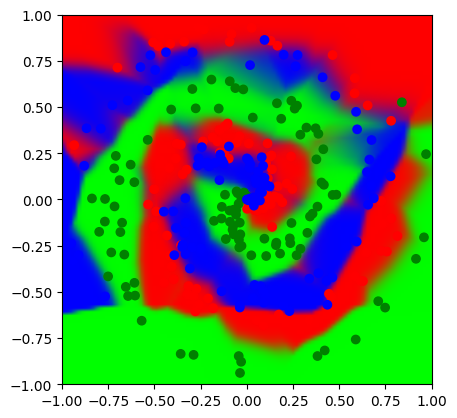

In [67]:
# SOL EJ 32b

# SOL EJ 30b

nnfs.init()

X, y = spiral_data(samples=100, classes=3)

dense1 = Layer_Dense(2, 64)
activation1 = Activation_ReLU()

dense2 = Layer_Dense(64, 3)
loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()

optimizer = Optimizer_Adam(learning_rate=0.05, decay= 5e-7)

for epoch in range(1000):
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    loss = loss_activation.forward(dense2.output,y)

    # Calculo de accuracy
    predictions = np.argmax(loss_activation.output,axis = 1)
    accuracy = np.mean(predictions == y)

    if epoch % 100 == 0:
        print(f"epoca : {epoch}, perdidas = {loss}, accuracy = {accuracy}")

    # Backward
    loss_activation.backward(loss_activation.output,y)
    dense2.backward(loss_activation.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    # actualizacion de parametros
    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.post_update_params()


# Este código a continuación te ayudará a visualizar los resultados de la red
# (asegúrate que el la lista 'model' contiene los mismo nombres para las
# distintas capas, y si no es así actualiza dicha variable con el naming usado)
model = [dense1, activation1, dense2, loss_activation]
num_points = 100
plot_prediction_performance_spiral(model, X, y, num_points)

 - **32.c** Interpreta los resultados que acabas de obtener. ¿Crees que la red ha aprendido correctamente la naturaleza de los datos de entrenamiento? Si no es así, investiga qué puede estar pasando y discute posibles soluciones (no es necesario implementar nada).

#!# PEDIDO
# SOL EJ 32c
Hay que tener en cuenta que para realizar una validación y evualucación del modelo correctamente, se tendrian que dividir los datos en train, validation y test. Por eso, para esta tarea al utilizar tan solo un conjunto de datos hay que tener en cuenta que la calidad real del modelo podria variar. Por este mismo motivo, es muy posible que sea un modelo muy sobre ajustado.

In [ ]:
# Combine X and y to shuffle them together
combined = np.c_[X.reshape(len(X), -1), y.reshape(len(y), -1)]

# Shuffle the combined array
np.random.shuffle(combined)

# Separate X and y again
X_shuffled = combined[:, :X.size // len(X)].reshape(X.shape)
y_shuffled = combined[:, X.size // len(X):].reshape(y.shape)

# Assign the shuffled data back to X and y
X, y = X_shuffled, y_shuffled

epoca : 0, perdidas = 1.0986133813858032, accuracy = 0.3380952380952381
epoca : 100, perdidas = 0.5970349311828613, accuracy = 0.7523809523809524
epoca : 200, perdidas = 0.406218945980072, accuracy = 0.8285714285714286
epoca : 300, perdidas = 0.29640933871269226, accuracy = 0.8904761904761904
epoca : 400, perdidas = 0.24248385429382324, accuracy = 0.9047619047619048
epoca : 500, perdidas = 0.20650705695152283, accuracy = 0.9142857142857143
epoca : 600, perdidas = 0.1763525754213333, accuracy = 0.9285714285714286
epoca : 700, perdidas = 0.15757013857364655, accuracy = 0.9428571428571428
epoca : 800, perdidas = 0.14526523649692535, accuracy = 0.9428571428571428
epoca : 900, perdidas = 0.13756248354911804, accuracy = 0.9428571428571428


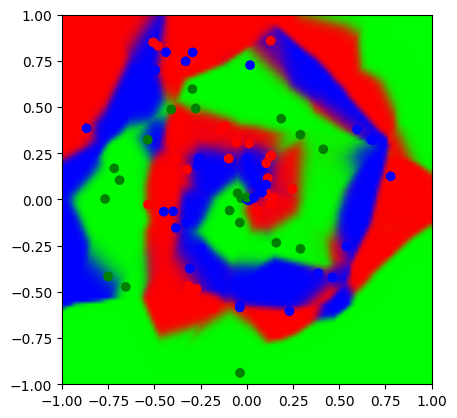

In [81]:
# SOL EJ 32b

# SOL EJ 30b

nnfs.init()

X, y = spiral_data(samples=100, classes=3)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

dense1 = Layer_Dense(2, 64)
activation1 = Activation_ReLU()

dense2 = Layer_Dense(64, 3)
loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()

optimizer = Optimizer_Adam(learning_rate=0.05, decay= 5e-7)

for epoch in range(1000):
    dense1.forward(X_train)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    loss = loss_activation.forward(dense2.output,y_train)

    # Calculo de accuracy
    predictions = np.argmax(loss_activation.output,axis = 1)
    accuracy = np.mean(predictions == y_train)

    if epoch % 100 == 0:
        print(f"epoca : {epoch}, perdidas = {loss}, accuracy = {accuracy}")

    # Backward
    loss_activation.backward(loss_activation.output,y_train)
    dense2.backward(loss_activation.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    # actualizacion de parametros
    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.post_update_params()


# Este código a continuación te ayudará a visualizar los resultados de la red
# (asegúrate que el la lista 'model' contiene los mismo nombres para las
# distintas capas, y si no es así actualiza dicha variable con el naming usado)
model = [dense1, activation1, dense2, loss_activation]
num_points = 100
plot_prediction_performance_spiral(model, X_test, y_test, num_points)

Como vemos, al diferenciar el conjunto de datos, los resultados no son tan buenos. Aun así, se puede visualizar como el modelo ha sido capaz de interpretar el las aproximadamente la distribución de los datos, se puede percibir, si bien con cierto error, las formas de las tres espirales 